### Loan Approval Prediction using Supervised Machine Learning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# STEP 1: Load Dataset

df = pd.read_csv("C:/Users/PMLS/OneDrive/Desktop/loan_approval/train_u6lujuX_CVtuZ9i.csv")  # Replace with path to train.csv
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

Dataset shape: (614, 13)

Sample data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         R

In [3]:
# STEP 2: Basic Preprocessing

# Drop Loan_ID (non-informative)
df.drop("Loan_ID", axis=1, inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
print(f"\nCategorical columns: {cat_cols.tolist()}")

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Encode labels using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check for remaining nulls
print(f"\nRemaining missing values:\n{df.isnull().sum()}")

# Impute numerical missing values (if any)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])


Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Remaining missing values:
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
# STEP 3: Train-Test Split

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# STEP 4: Train ML Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    print(f"\n{name} Results:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {acc:.4f} | AUC: {auc:.4f}")
    results[name] = (acc, auc)

C:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886 | AUC: 0.7031

Decision Tree Results:
[[23 20]
 [15 65]]
              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57        43
         1.0       0.76      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123

Accuracy: 0.7154 | AUC: 0.6737

Random Forest Results:
[[18 25]
 [ 3 77]]
              precision    recall  f1-score   support

         0.0       0.86      0.42      0.56        43
         1.0       0.75      0.96      0

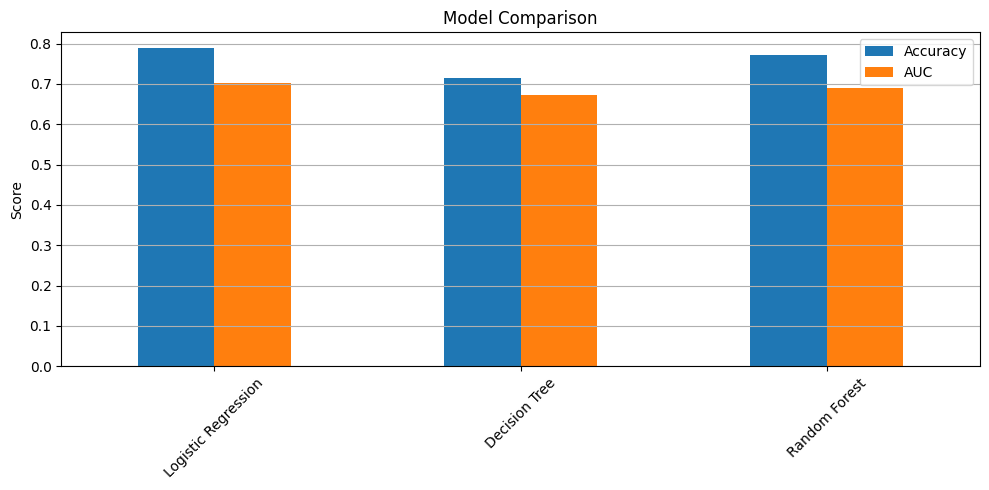

In [6]:
# STEP 5: Visualize Model Performance

results_df = pd.DataFrame(results, index=["Accuracy", "AUC"]).T
results_df.plot(kind="bar", figsize=(10, 5), legend=True)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()